In [3]:
from cobra.io import read_sbml_model, write_sbml_model
from cobra import Reaction, Metabolite

import cobra.io
from cobra.flux_analysis import production_envelope
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 

In [4]:
model = read_sbml_model('iCGB21FR_glycerolfeedstock.xml')

In [4]:
model


Name,iCBG21FR
Memory address,23d2aecd550
Number of metabolites,1042
Number of reactions,1539
Number of genes,805
Number of groups,102
Objective expression,1.0*DAPDC - 1.0*DAPDC_reverse_d3ab8
Compartments,"cytosol, periplasm, extracellular space"


In [5]:
modeloriginal = read_sbml_model('iCGB21FR.xml')

SBML package 'layout' not supported by cobrapy, information is not parsed
https://juser.fz-juelich.de/record/188973 does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id


In [6]:
modeloriginal

Name,iCBG21FR
Memory address,23d3ee58090
Number of metabolites,1042
Number of reactions,1539
Number of genes,805
Number of groups,102
Objective expression,1.0*Growth - 1.0*Growth_reverse_699ae
Compartments,"cytosol, periplasm, extracellular space"


In [41]:
print(modeloriginal.objective.expression)
print(modeloriginal.objective.name)
print(modeloriginal.objective)
model.reactions.Growth #Biomass generation reaction

1.0*Growth - 1.0*Growth_reverse_699ae
6eb14bf3-82ef-11ee-a7d4-b0359fd864cb
Maximize
1.0*Growth - 1.0*Growth_reverse_699ae


Reaction identifier,Growth
Name,
Memory address,0x23d3f3cba50
Stoichiometry,0.000215957436615497 10fthf_c + 0.497466186805283 ala__L_c + 0.000215957436615497 amet_c + 0.0062974490405647 amp_c + 0.286450592337987 arg__L_c + 0.233442241629366 asn__L_c + 0.233442241629366... 0.000215957436615497 10-Formyltetrahydrofolate + 0.497466186805283 L-Alanine + 0.000215957436615497 S-Adenosyl-L-methionine + 0.0062974490405647 AMP + 0.286450592337987 L-Arginine +...
GPR,
Lower bound,0.0
Upper bound,1000.0


In [39]:
print(model.reactions.Growth)

Growth: 0.000215957436615497 10fthf_c + 0.497466186805283 ala__L_c + 0.000215957436615497 amet_c + 0.0062974490405647 amp_c + 0.286450592337987 arg__L_c + 0.233442241629366 asn__L_c + 0.233442241629366 asp__L_c + 52.4155146188655 atp_c + 0.0542420540814976 ca2_c + 0.0613181689413663 cl_c + 0.00284729052433628 coa_c + 0.129291683621802 ctp_c + 0.0342100689811831 cu2_c + 0.0886878118620952 cys__L_c + 0.0114582929862282 datp_c + 0.0144799266879183 dctp_c + 0.0127140840198214 dgtp_c + 0.0117989352923303 dttp_c + 0.000215957436615497 fad_c + 0.0389276218726522 fe2_c + 0.0389276218726522 fe3_c + 0.254849143586252 gln__L_c + 0.0148774528144029 glu__L_c + 0.593290278265672 gly_c + 0.208303052853126 gtp_c + 47.0666420920129 h2o_c + 2.15678814560218 h_c + 0.0917460790586501 his__L_c + 0.281353803150062 ile__L_c + 0.0556012165101363 k_c + 0.436302779712182 leu__L_c + 0.332323631867312 lys__L_c + 0.14883244216901 met__L_c + 0.0894430382011216 mg2_c + 0.000215957436615497 mlthf_c + 0.03957026292430

In [5]:
# In this plot, we are looking at the dynamics between the L-lysine creating reaction (DAPDC) and the biomass formation 
#reaction (Growth)
ppp_Lys = production_envelope(model,
                    reactions=[model.reactions.DAPDC],
                    objective=model.reactions.Growth)

FileNotFoundError: [Errno 2] No such file or directory: 'figures/glycerolmedium_ppp.png'

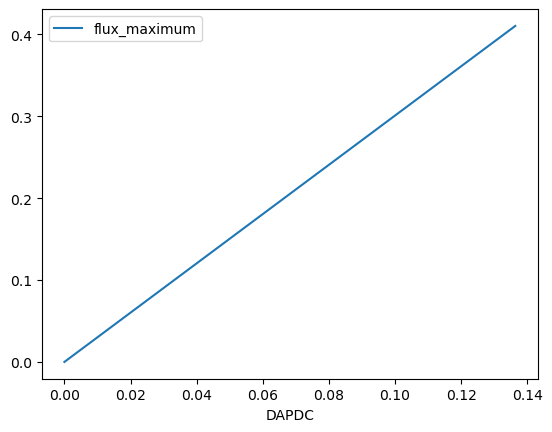

In [6]:
pppp = ppp_Lys.plot(x='DAPDC', y='flux_maximum')
fig = pppp.get_figure()
fig.savefig("figures/glycerolmedium_ppp")

It seems that the production of Lysine does not require a trade-off on the biomasss generation. 

In [7]:
model.medium #Does not have glucose but EX_glyc3p_e

{'EX_h2o_e': 10.0,
 'EX_h_e': 10.0,
 'EX_cl_e': 10.0,
 'EX_pi_e': 10.0,
 'EX_nh4_e': 10.0,
 'EX_fe3_e': 10.0,
 'EX_k_e': 10.0,
 'EX_ca2_e': 10.0,
 'EX_mg2_e': 10.0,
 'EX_mn2_e': 10.0,
 'EX_zn2_e': 10.0,
 'EX_cu2_e': 10.0,
 'EX_o2_e': 10.0,
 'EX_fe2_e': 10.0,
 'EX_glyc3p_e': 10.0,
 'EX_so4_e': 10.0,
 'EX_urea_e': 10.0,
 'EX_btn_e': 10.0,
 'EX_na1_e': 10.0,
 'EX_ni2_e': 10.0,
 'EX_34dhbz_e': 10.0}